## **Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from scipy.stats import norm

## **Importing datasets**

In [2]:
calendar_df = pd.read_csv("calendar.csv")
listings_df = pd.read_csv("listings.csv")
hosts_df = pd.read_csv("hosts.csv")
reviews_df = pd.read_csv("reviews.csv")

# Data Understanding and feature creation (Task 1): 


**Look at the table Calendar how many rows and unique listing ids are present? Are there any implications when it comes to having more rows and less unique listing ids?**

# **Calendar Table**

**Count rows and unique listing IDs:** Determine the number of rows and unique listings in the calendar table. This will help to understand data's granularity and identify if multiple records exists for each listing.

In [3]:
total_rows_cal = calendar_df.shape[0]

#Count total number of unique Listing IDs in the calendar dataset
unique_listing_ids_cal = calendar_df['listing_id'].nunique()

f"Total number of rows in calendar table are {total_rows_cal} and Total Unique listing_ids are {unique_listing_ids_cal}."

'Total number of rows in calendar table are 319192 and Total Unique listing_ids are 1749.'

Here, total number of rows in calendar table means total number of bookings. And there are more bookings compared to the total number of listing suggests few implications.

A maximum number of bookings relative to the total number of listings could indicate a large proportion of the available listings or properties are currently booked or occupied by guests. This could be a positive sign forhosts or property managers as it suggests a strong demand for accommodation in the area. It also indicates a strong demand for accommodations in the area. This might have different reasons such as tourism, events, or business travel.

With fewer listings available compared to the number of bookings, there may be increased competition among guests to secure accommodations.

Hosts in this situation may have opportunity to charge higher prices by offering attractive amenities or improving the quality of their listings..

Higher number of bookings compared to the total number of listings is a big challenge for guests in finding accommodations, it could also indicate a healthy and competitive market for hosts.

**Look at the price column in Calendar table. What transformations you will need to perform so that you can create a column that can be used as a target/response variable?**

**Price Column Transformation:** The price column will serve as our target variable we need to ensure that it is the numerical format suitable for regression analysis, Any missing value will also need to be addressed. either by removal or imputation.

In [4]:
#Check the datatype of Price Column
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


As we can see over here that the Price column is a numerical variable.It means that it is suitable for the further analysis.  .

In [5]:
#Check Percentage of null values in Price column
calendar_df['price'].isnull().sum()

75

In [6]:
calendar_df['price'].isnull().sum() / len(calendar_df['price']) * 100

0.023496829494473546

With only 0.023% of missing values in the price column it would be more appropriate to apply data imputation techniques in this case rather than dropping the missing rows. Dropping such a small percentage of rows may lead to loss valuable information, especially in such a column where each entry is valuable for price prediction.

In [7]:
#Replacing all the null values in price with mean
mean = calendar_df['price'].mean()

calendar_df['price'] = calendar_df['price'].fillna(mean)
calendar_df['price'].isnull().sum()

0

<Axes: >

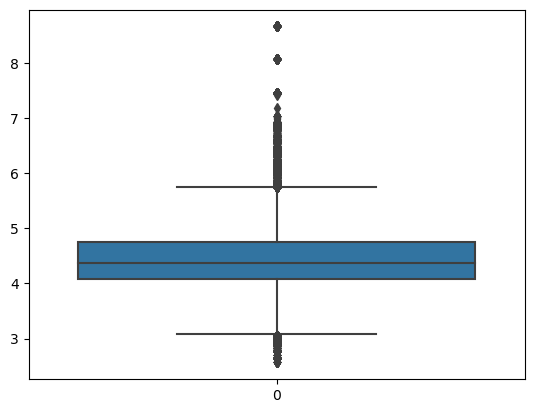

In [8]:
sns.boxplot(np.log(calendar_df['price']))

This boxplot shows that price column has some outliers.

**Outliers Treatment with Price Column**

In [9]:

#Calculate mean and Stansard deviation
Mean_price = calendar_df['price'].mean()
std_price = calendar_df['price'].std()

#Define Threshold for outliers (e.g 2 standard deviation for the mean)
threshold = 2

#Identify outliers
outliers =  calendar_df[(calendar_df['price']-Mean_price).abs()>threshold *std_price]
calendar_df_new = calendar_df.drop(outliers.index)

Text(0.5, 1.0, 'log price distribution plot')

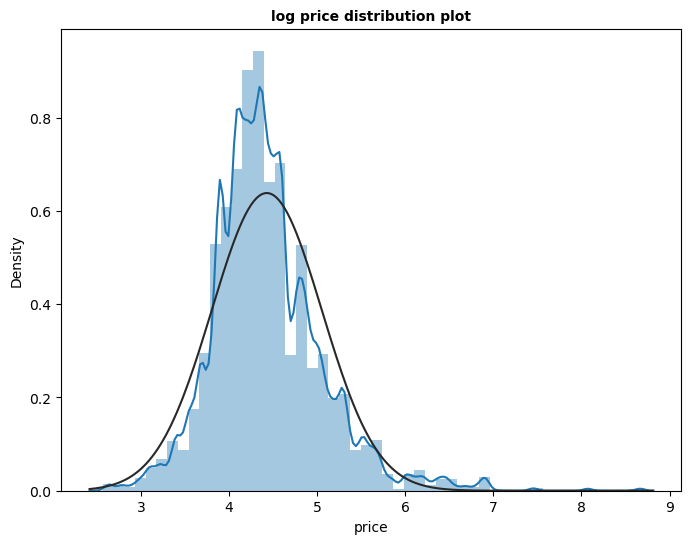

In [10]:
plt.figure(figsize=(8, 6))
sns.distplot(np.log(calendar_df['price']),fit=norm)
plt.title("log price distribution plot", size=10, weight='bold')

now we can see here that black line is the normal destribution and blue line is what we are actually having.

**Look at the tables Listings, Hosts and Reviews to come up with a list of potential transformations needed in order to have predictors that can be used to predict the listing price.**

# **Listing Table**

In [11]:
listings_df = pd.read_csv("listings.csv")
listings_df.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [12]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [13]:
listings_df.isnull().sum()

listing_id          0
listing_url         0
name                0
description        70
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms          128
beds               41
amenities           0
host_id             0
dtype: int64

I don't think the null values in 'beds' & 'bedrooms' should be replaced with 0 because in my travel experience with airbnb so far i haven't seen any room without bed and bedroom.

In [14]:
#replacing all the null values in "bed & bedrooms" with 1
listings_df.fillna({'bedrooms':1}, inplace =True)
listings_df.fillna({'beds':1}, inplace =True)


In [15]:
listings_df['bathrooms_text']

0       1 private bath
1            2.5 baths
2               1 bath
3       2 shared baths
4               1 bath
             ...      
1744         1.5 baths
1745            1 bath
1746            1 bath
1747         7.5 baths
1748         1.5 baths
Name: bathrooms_text, Length: 1749, dtype: object

In [16]:
#Convert a bathrooms_text column into numerical variable
#We use a regular expression (r'(\d+(\.\d+)?)') to extract numerical values from the 'bathroom_text' column.
#The .str.extract() function is used to extract the numerical values from each row of the 'bathroom_text' column.

listings_df['bathrooms_text'] =listings_df['bathrooms_text'].str.extract(r'(\d+(\.\d+)?)').iloc[:, 0].astype(float)

# **Host Table**

In [17]:
hosts_df.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,9/14/2010,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,1/4/2011,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2/27/2011,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,3/20/2011,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,3/25/2011,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [18]:
hosts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [19]:
hosts_df.isnull().sum()

host_id            0
host_name          0
host_since         0
host_location      3
host_about       621
dtype: int64

# **Review Table**

In [20]:
reviews_df.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,5/6/2015,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,10/10/2021,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,3/5/2012,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,5/25/2012,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,9/3/2013,7984251,Marcel,This is a very nice appartement. We really lik...


In [21]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [22]:
reviews_df.isnull().sum()

review_id         0
listing_id        0
date              0
reviewer_id       0
reviewer_name     0
comments         64
dtype: int64

## Important Feature(Predictors) for Price Prediction From Listing, Hosts and Review Tables are:


Based on the information in the **Listings, Hosts, and Reviews tables**, potential transformations for predictor variables may include:

**property_type, room_type** Encoding categorical variables: Convert categorical variables such as property type and room type into numerical representations using techniques like one.

**bedrooms, beds** use these numerical features directly as predictors, as they directly contribute to the property's amenities and desirability.

 **bathroom_text** column

Utilize the **accommodates** column to understand the maximum number of guests the property can accommodate.

**Latitude and longitude** provide precise geographic coordinates of a particular point on the Earth's surface. These coordinates help in identifying the exact location of a property, landmark

**Drop the column which are not informative for the analysis**

In [23]:
listings_features = listings_df.drop(columns=['listing_url','name','description','amenities'])
reviews_features =  reviews_df.drop(columns=['review_id','date','reviewer_id','reviewer_name','comments'])
hosts_features = hosts_df.drop(columns=['host_name','host_location','host_about'])
list_review_hosts_features = pd.merge( reviews_features, listings_features, on='listing_id', how='inner').merge(hosts_features, on='host_id')
list_review_hosts_features.head()


,listing_id,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,host_id,host_since
0,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,1.0,234077,9/14/2010
1,50904,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,1.0,234077,9/14/2010
2,891884,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,1.0,234077,9/14/2010
3,891884,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1.0,1.0,1.0,234077,9/14/2010
4,891907,51.218575,4.398631,Entire rental unit,Entire home/apt,4,1.5,2.0,2.0,234077,9/14/2010


In [24]:
list_review_hosts_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62987 entries, 0 to 62986
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      62987 non-null  int64  
 1   latitude        62987 non-null  float64
 2   longitude       62987 non-null  float64
 3   property_type   62987 non-null  object 
 4   room_type       62987 non-null  object 
 5   accomodates     62987 non-null  int64  
 6   bathrooms_text  62987 non-null  float64
 7   bedrooms        62987 non-null  float64
 8   beds            62987 non-null  float64
 9   host_id         62987 non-null  int64  
 10  host_since      62987 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 5.8+ MB


**Create an aggregated view of data spread across different tables, containing the target as well as predictor variables.**

In [25]:
# Let's create an aggregated view of all the tables(merge the dataset)


merged_df = pd.merge(list_review_hosts_features,calendar_df_new, on='listing_id', how='inner')
merged_df.isnull().sum()

listing_id          0
latitude            0
longitude           0
property_type       0
room_type           0
accomodates         0
bathrooms_text      0
bedrooms            0
beds                0
host_id             0
host_since          0
calender_id         0
date                0
available           0
price               0
adjusted_price    496
minimum_nights      0
maximum_nights      0
dtype: int64

In [26]:
# Convert 'date' column to datetime type if it's not already
merged_df['host_since'] = pd.to_datetime(merged_df['host_since'])

In [27]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

## **Data Quality and checks (Task 1):**
### Once the aggregated dataset has been created, do a data audit. Create a data quality report which has the following basic structure:
***Continuous Variables:*** (#unique values, percentage_missing_values, min, max, average, 25th percentile, 75th percentile, 90th percentile, 95th percentile)
***Categorical Variables:*** (#Unique values, percentage_missing_values)

**Continuous Variable**

In [28]:
# Summary statistics for continuous variables
# Exclude ID columns from continuous variables
continuous_variables = merged_df.select_dtypes(include=['float64', 'int64']).drop(columns=['calender_id','listing_id','host_id'])

Summary_stats = continuous_variables.describe()
Summary_stats

,latitude,longitude,accomodates,bathrooms_text,bedrooms,beds,available,price,adjusted_price,minimum_nights,maximum_nights
count,1.136662e+07,1.136662e+07,1.136662e+07,1.136662e+07,1.136662e+07,1.136662e+07,1.136662e+07,1.136662e+07,1.136613e+07,1.136662e+07,1.136662e+07
mean,5.121677e+01,4.413025e+00,3.646420e+00,1.294547e+00,1.428987e+00,2.163077e+00,5.464187e-01,8.474965e+01,8.462926e+01,3.109107e+00,9.830392e+02
std,1.133662e-02,1.682694e-02,2.415954e+00,4.808571e-01,8.689670e-01,1.678062e+00,4.978407e-01,5.119210e+01,5.131286e+01,7.593980e+00,8.333107e+02
min,5.116288e+01,4.290770e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,1.400000e+01,1.000000e+00,1.000000e+00
25%,5.121161e+01,4.402130e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,5.500000e+01,5.500000e+01,1.000000e+00,1.125000e+03
50%,5.121863e+01,4.408870e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,7.000000e+01,7.000000e+01,2.000000e+00,1.125000e+03
75%,5.122224e+01,4.421600e+00,4.000000e+00,1.500000e+00,2.000000e+00,3.000000e+00,1.000000e+00,9.900000e+01,9.900000e+01,2.000000e+00,1.125000e+03
max,5.134940e+01,4.483470e+00,1.600000e+01,8.500000e+00,1.100000e+01,2.500000e+01,1.000000e+00,4.810000e+02,6.000000e+02,3.000000e+02,9.999000e+03


In [29]:
# Calculate percentage of missing values
missing_values_percentage_continuous = (continuous_variables.isna().sum() / len(continuous_variables)) * 100
#Calculate unique value
continuous_unique_val = continuous_variables.nunique()

In [30]:
continuous_unique_and_Percentage_missing_val = pd.DataFrame({'#unique_values': continuous_unique_val,
                                    'percentage_missing_values': missing_values_percentage_continuous})

print("For Continuous Variables:")
print(continuous_unique_and_Percentage_missing_val)

For Continuous Variables:
                #unique_values  percentage_missing_values
latitude                  1207                   0.000000
longitude                 1304                   0.000000
accomodates                 15                   0.000000
bathrooms_text              12                   0.000000
bedrooms                     9                   0.000000
beds                        15                   0.000000
available                    2                   0.000000
price                      390                   0.000000
adjusted_price             391                   0.004364
minimum_nights              30                   0.000000
maximum_nights             202                   0.000000


## **Categorical Variables**

In [31]:
# Summary statistics for categorical variables
# Categorical Variables
categorical_variables = merged_df.select_dtypes(include=['object'])

categorical_summary = pd.DataFrame({'#unique_values': categorical_variables.nunique(),
                                    'percentage_missing_values': (categorical_variables.isnull().sum() / len(categorical_variables)) * 100})

print("Categorical Variables Summary:")
print(categorical_summary)

Categorical Variables Summary:
               #unique_values  percentage_missing_values
property_type              32                        0.0
room_type                   4                        0.0


**Highlight any data anomaly that you find and fix it.**

**Anomalies in the data:**
Missing Values: Absent or incomplete data points in the columns like bedrooms, beds, price.
Using Data imputation method this anomaly can be fixed.
Outlier treatment: In price column outliers checked and removed.

## **Variable profiling and checking relationships between variables (Task 2):**

**Assess the relationship between target and predictor variables. You can compute correlations, plot bivariate relationships.**

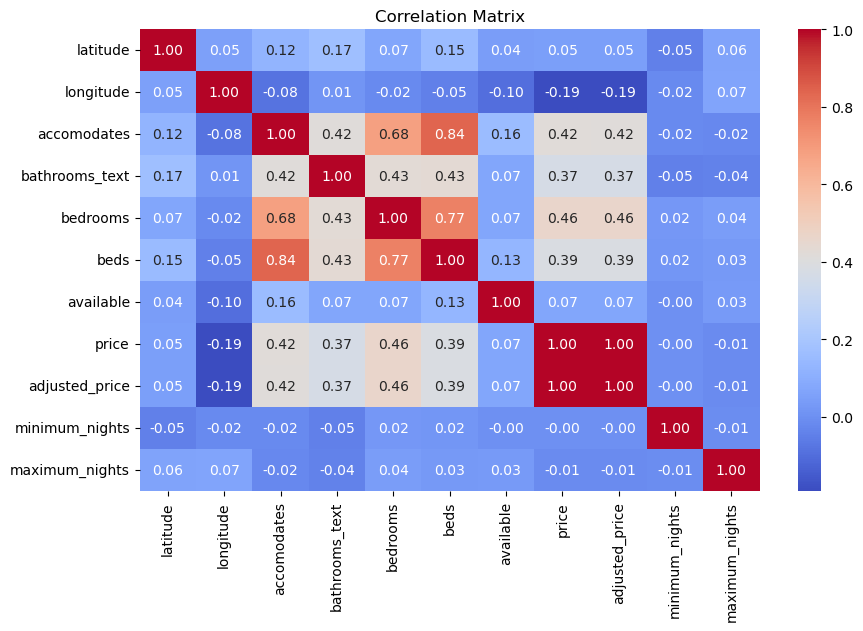

In [32]:
# Assess relationship between target (price) and predictor variables
correlation_matrix = continuous_variables.corr()
#correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **Exploratory Data Analysis**

In [33]:
# Group by date and calculate availability
availability_over_time = merged_df.groupby('date')['available'].mean()

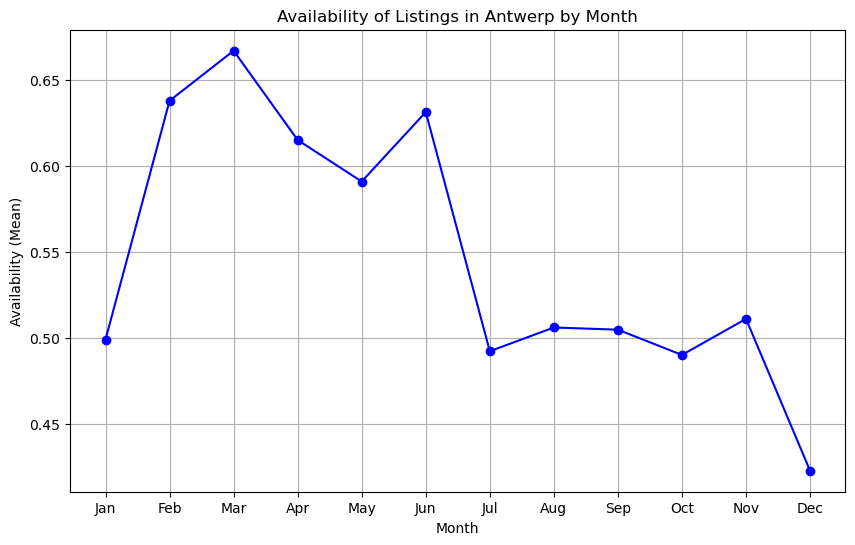

In [34]:
# Extract month and year from the date column
merged_df['month'] = merged_df['date'].dt.month

# Aggregate availability by month
availability_by_month = merged_df.groupby('month')['available'].mean()

# Plot the availability by month
plt.figure(figsize=(10, 6))
availability_by_month.plot(marker='o', color='blue', linestyle='-')
plt.title('Availability of Listings in Antwerp by Month')
plt.xlabel('Month')
plt.ylabel('Availability (Mean)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

The line graph shows the availability of listings over time. The highest number of listings available in March, with oover 16000 listings. The lowest number of listings available was in January, with just over 1000 listings.
As of my research Summer (June to August) season tends to be popular for tourists due to pleasant weather for outdoor activities and festivals. That's why the availability of listings is low in summer season.
Spring (March to May) and Autumn (September to November): These seasons offer mild temperatures and fewer crowds compared to summer.

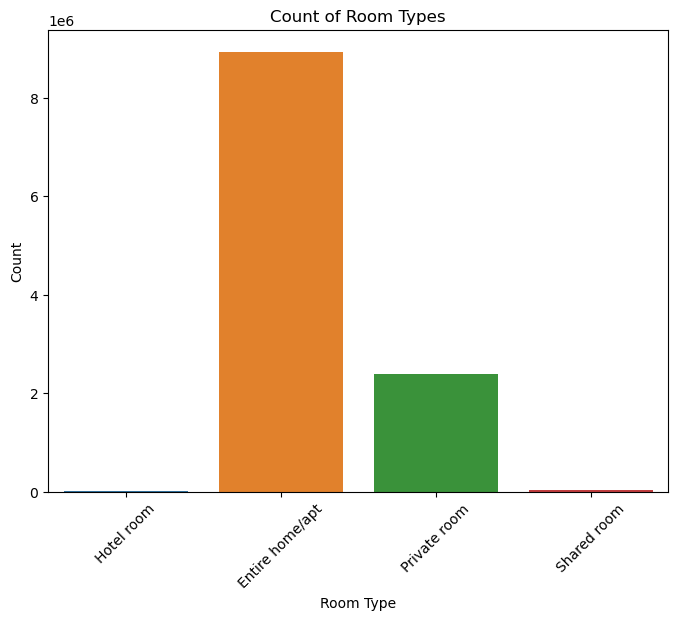

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_df, x='room_type')
plt.title('Count of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The graph the different type of Room type and number of bookings for each type room type(accomodation). The most popular of room type is Entire home, with 1379 bookings. The second most popular type of accomodation is the private room, with 354 bookings followed by Hotel room, with 10 bookings and the least popular type of accomodation is the Shared room, with 6 bookings. There are more than twice as many bookings for entire homes as there are for other room types. This suggests that people are more likely to book an entire home.

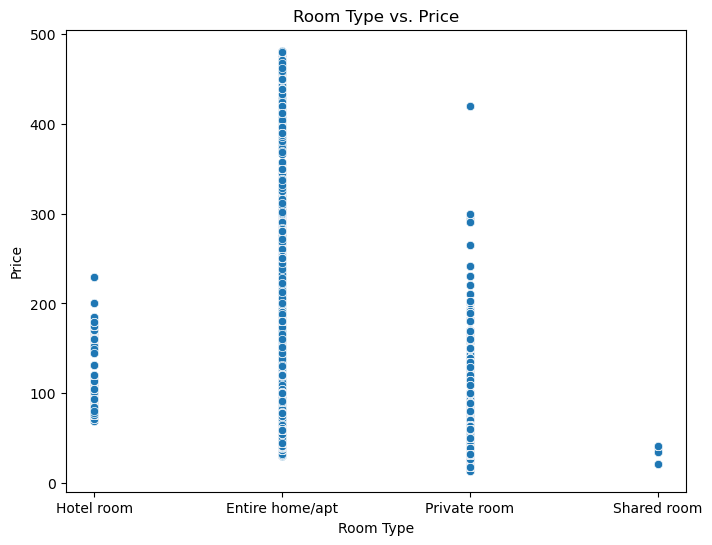

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='room_type', y='price')
plt.title('Room Type vs. Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

It shows that the shared is having less price and Entire home is having high price mainly concentrated between 0 to 1500 followed by private room and hotel room.

In [37]:
average_price_by_property_type = merged_df.groupby('property_type')['price'].mean().sort_values()


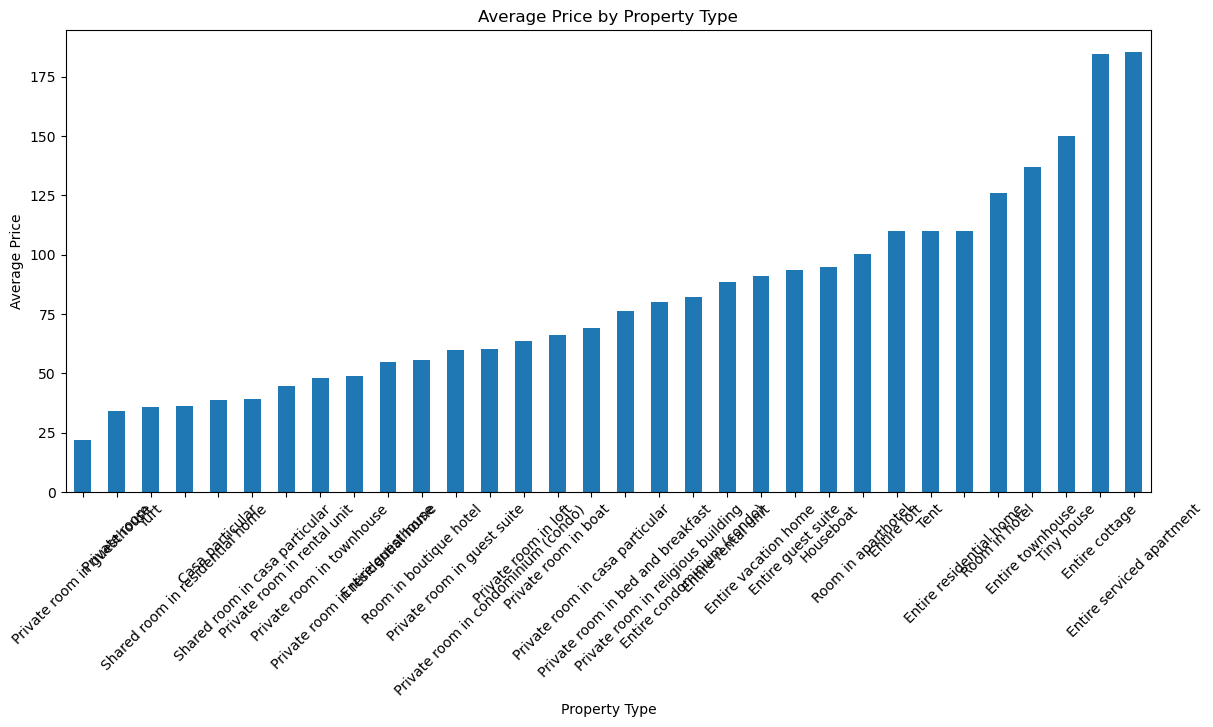

In [38]:
# Plot a bar chart of average price by property type
plt.figure(figsize=(14, 6))
average_price_by_property_type.plot(kind='bar')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

The above bar chart shows that the Property type **Castle** has high price followed by **Entire villa** and **Private room in villa**.

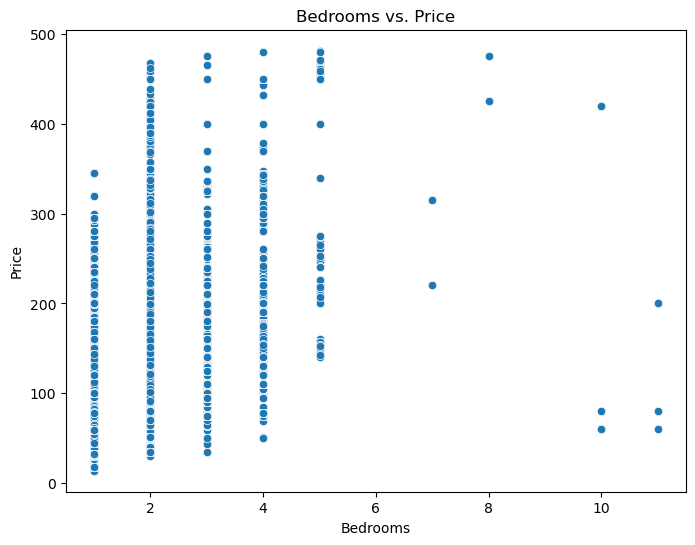

In [39]:
# Scatter plot of bedrooms vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='bedrooms', y='price')
plt.title('Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

The data is plotted as scatter plot, with each point representing a single airbnb listing. And Airbnb listings with more bedrooms are more expensive.

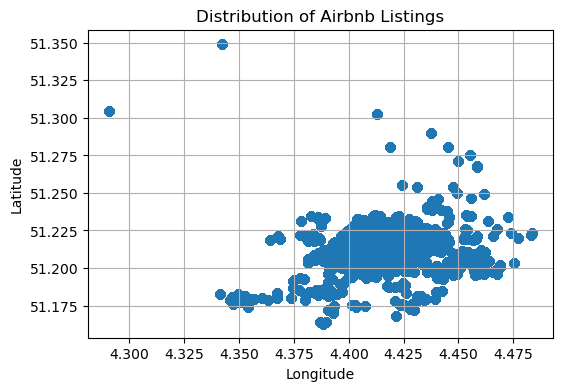

In [40]:
# Create a scatter plot of latitude vs longitude
plt.figure(figsize=(6, 4))
plt.scatter(merged_df['longitude'], merged_df['latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of Airbnb Listings')
plt.grid(True)
plt.show()

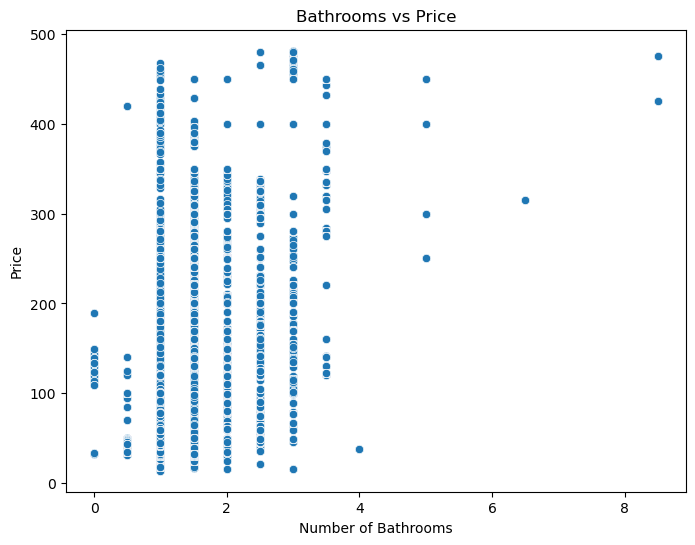

In [41]:
# Scatter plot for bathrooms vs price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bathrooms_text', y='price', data=merged_df)
plt.title('Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()



The Above scatter plot shows the positive correlation between the number of bathrooms and price of the listings. listings with more bathrooms tend to be more expensive.

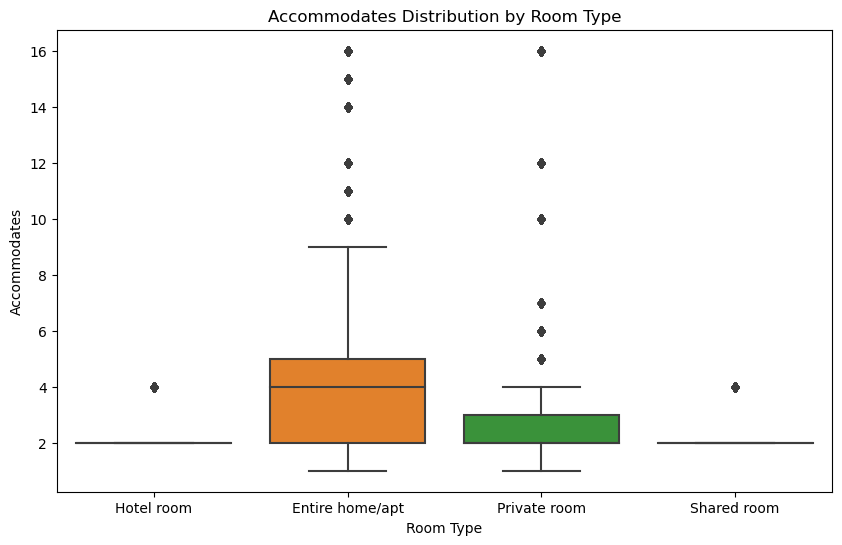

In [42]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create box plot for accommodates and room type
sns.boxplot(x='room_type', y='accomodates', data=merged_df)

# Set labels and title
plt.xlabel('Room Type')
plt.ylabel('Accommodates')
plt.title('Accommodates Distribution by Room Type')

# Show plot
plt.show()


The distribution of accommodates by room type shows that entire homes have the highest capacity, with a significant proportion accommodating larger groups. Private rooms also offer relatively high accommodates, catering to smaller groups or individuals. In contrast, shared rooms and hotel rooms generally accommodate fewer guests, making them suitable for solo travelers or smaller parties

**Based on the above analysis summarize your findings and list down the transformations you will do on different predictors, remove the variables from further
analysis.**

Based on the above heat map and correlation between the predictors and response variable here decided to drop unnecessary column

**Drop Columns And Feature Selection**

In [43]:
merged_df.drop(['listing_id','latitude','longitude','property_type','calender_id','beds','month','minimum_nights','date','adjusted_price','host_id','host_since',], axis=1, inplace=True)
#examining the changes
merged_df.head(5)

,room_type,accomodates,bathrooms_text,bedrooms,available,price,maximum_nights
0,Hotel room,2,1.0,1.0,1,165.0,60
1,Hotel room,2,1.0,1.0,1,150.0,60
2,Hotel room,2,1.0,1.0,1,165.0,60
3,Hotel room,2,1.0,1.0,1,165.0,60
4,Hotel room,2,1.0,1.0,0,165.0,60


In [44]:
#Encode the input Variables
def Encode(merged_df):
    for column in merged_df.columns[merged_df.columns.isin(['room_type'])]:
        merged_df[column] = merged_df[column].factorize()[0]
    return merged_df

merged_df_en = Encode(merged_df.copy())
merged_df_en

,room_type,accomodates,bathrooms_text,bedrooms,available,price,maximum_nights
0,0,2,1.0,1.0,1,165.0,60
1,0,2,1.0,1.0,1,150.0,60
2,0,2,1.0,1.0,1,165.0,60
3,0,2,1.0,1.0,1,165.0,60
4,0,2,1.0,1.0,0,165.0,60
...,...,...,...,...,...,...,...
11366618,2,1,1.5,1.0,0,33.0,14
11366619,2,1,1.5,1.0,0,33.0,14
11366620,2,1,1.5,1.0,0,33.0,14
11366621,2,1,1.5,1.0,1,33.0,14


# **Modelling and insights (Task 2):**

**Regression Analysis**

Index(['room_type', 'accomodates', 'bathrooms_text', 'bedrooms', 'available',
       'price', 'maximum_nights'],
      dtype='object')

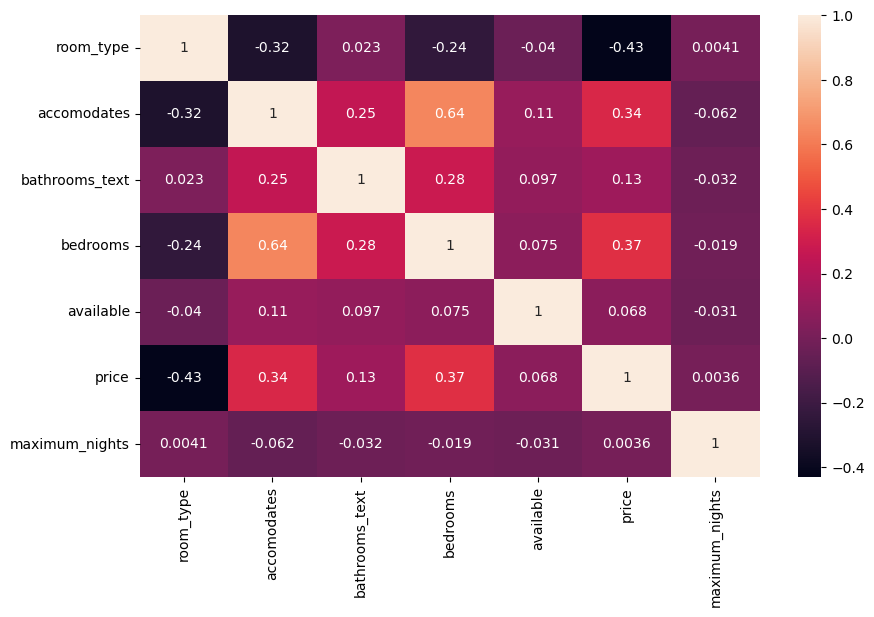

In [127]:
#Get Correlation between different variables
corr = merged_df_en.corr(method='kendall')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)
merged_df_en.columns

# Importing Models

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,  mean_squared_error
#Evaluation metrics for regression models

This dataset contains around 11366623 rows, for better model performance i have taken a sample of 20000 rows.

In [98]:
df_sample=merged_df_en.sample(20000)

In [99]:
df_sample.head(10)

,room_type,accomodates,bathrooms_text,bedrooms,available,price,maximum_nights
1426806,1,3,1.0,1.0,1,65.0,1125
2035116,1,2,1.0,1.0,0,62.0,1125
8808849,2,2,1.0,1.0,1,50.0,7
8223951,2,2,1.0,1.0,0,62.0,1125
11120976,1,3,1.0,2.0,0,71.0,1125
5789586,1,2,1.0,1.0,1,63.0,1125
1247730,1,5,1.5,2.0,0,115.0,1125
9859436,2,2,1.0,1.0,1,150.0,1000
4914661,1,4,1.0,2.0,0,85.0,1125
3385353,1,4,1.0,1.0,0,76.0,1125


In [103]:
#Defining the independent variables and dependent variables
x = df_sample.iloc[:,[0,1,2,3,4,6]]
y = df_sample['price']

The approach of creating train/test/validation splits involves partitioning the dataset into separate subsets to facilitate model training, evaluation, and validation
x: The feature matrix containing the independent variables.
y: The target vector containing the dependent variable.
test_size: The proportion of the dataset to include in the test split. In this case, it's set to 0.3, meaning 30% of the data will be used for testing.
random_state: Controls the randomness of the data splitting process. Setting a fixed random state ensures reproducibility, as the same random splits will be generated each time the code is run.

## Splitting the data

In [109]:

#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.head()

,room_type,accomodates,bathrooms_text,bedrooms,available,maximum_nights
2697909,1,6,1.5,3.0,0,1125
5125045,1,6,2.0,3.0,0,1125
7749846,1,3,1.5,1.0,0,1100
1651815,2,2,1.5,1.0,1,1125
5434397,1,1,1.0,1.0,0,1125


In [108]:
y_train.head()

2697909     80.0
5125045    150.0
7749846     49.0
1651815     48.0
5434397     45.0
Name: price, dtype: float64

In [110]:
x_train.shape

(14000, 6)

In [111]:
y_train.shape

(14000,)

# **# Prepare a Linear Regression Model**

In [112]:

reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([76.85460028, 89.28934351, 69.99215994, ..., 96.47134636,
       76.438233  , 77.60680759])

In [113]:
mse = mean_squared_error(y_test,y_pred)
import math
rmse=math.sqrt(mse)
r2_lr = r2_score(y_test,y_pred)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error (RMSE):",rmse)
print("R-squared (R2) Score:",r2_lr)

Mean Squared Error (MSE): 1726.2883177991137
Root Mean Squared Error (RMSE): 41.548625943575004
R-squared (R2) Score: 0.37680748041145806


In [114]:
#Create a df to display actual vs predicted values Linear Regression Model
Comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

#Print the df
print(Comparison_df)

          Actual   Predicted
4484125     60.0   76.854600
1161916     85.0   89.289344
1669371     38.0   69.992160
2524399     43.0   76.438233
6902617     59.0  113.417682
...          ...         ...
7860657     79.0   75.686026
10459889   169.0   65.099540
5213062    109.0   96.471346
2905624     80.0   76.438233
4843939     58.0   77.606808

[6000 rows x 2 columns]


# Prepairng a Decision Tree Regression

In [118]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(x_train, y_train)


DecisionTreeRegressor()

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

In [120]:
mse2 = mean_squared_error(y_test,y_predict)
import math
rmse2=math.sqrt(mse2)
r2_dt= r2_score(y_test,y_predict)
print("Mean Squared Error (MSE):",mse2)
print("Root Mean Squared Error (RMSE):",rmse2)
print("R-squared (R2) Score:", r2_dt)

Mean Squared Error (MSE): 872.1789944688521
Root Mean Squared Error (RMSE): 29.532676723738607
R-squared (R2) Score: 0.6912266499093778


In [121]:
#Create a df to display actual vs predicted values for Decision Tree Regressor
Comparison_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

#Print the df
print(Comparison_df2)

          Actual   Predicted
4484125     60.0   71.191818
1161916     85.0   75.000000
1669371     38.0   39.741935
2524399     43.0   68.281407
6902617     59.0   76.253968
...          ...         ...
7391520     89.0   89.285068
10815948    75.0   84.033708
2827364    115.0  111.250000
7523113     63.0   50.896875
1945935     38.0   37.927928

[4000 rows x 2 columns]


# Preparing Random Forest Regressor Model

In [122]:
from sklearn.ensemble import RandomForestRegressor


# Instantiate the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred3 = rf_regressor.predict(x_test)

# Calculate RMSE (Root Mean Squared Error)
mse3 = mean_squared_error(y_test,y_pred3)

# Calculate MSE (Mean Squared Error)
rmse3 = math.sqrt(mse3)

# Calculate R2 score (Coefficient of Determination)
r2_rf = r2_score(y_test, y_pred3)

# Print the evaluation metrics
print("Root Mean Squared Error (RMSE): {:.4f}".format(rmse3))
print("Mean Squared Error (MSE): {:.4f}".format(mse3))
print("R-squared (R2) Score: {:.4f}".format(r2_rf))


Root Mean Squared Error (RMSE): 29.3960
Mean Squared Error (MSE): 864.1263
R-squared (R2) Score: 0.6941


In [63]:
#Create a df to display actual vs predicted values For Random Forest Regressor
Comparison_df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})

#Print the df
print(Comparison_df3)

          Actual   Predicted
6049831     52.0   71.985938
2028173     80.0   81.748240
6354521     53.0   51.591020
10573367    45.0   66.529882
10291552    49.0  106.052262
...          ...         ...
633281      65.0   24.360062
5692125     55.0   66.529882
8068373     73.0   83.649210
692811      34.0   55.628311
5908748     90.0   79.576630

[4000 rows x 2 columns]


#  Gradient Boosting Regressor Model

In [123]:

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
# Train the regressor on the training data
gbm_regressor.fit(x_train, y_train)
# Make predictions on the testing data
y_pred4 = gbm_regressor.predict(x_test)
# Evaluate the regressor
mse4 = mean_squared_error(y_test, y_pred4)
print("Mean Squared Error:", mse4)
# Calculate MSE (Mean Squared Error)
rmse4 = math.sqrt(mse4)
print('Root Mean Squared Error (RMSE):',rmse4)
# Calculate R2 score (Coefficient of Determination)
r2_gb = r2_score(y_test, y_pred4)
print('R-squared (R2) Score:',r2_gb)

Mean Squared Error: 1140.61141983471
Root Mean Squared Error (RMSE): 33.77293916488036
R-squared (R2) Score: 0.5961948046358707


In [124]:
#Create a df to display actual vs predicted values for Gradient Boosting regressor
Comparison_df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})

#Print the df
print(Comparison_df4)

          Actual   Predicted
4484125     60.0   71.745651
1161916     85.0   90.232301
1669371     38.0   59.182358
2524399     43.0   69.417622
6902617     59.0   82.265562
...          ...         ...
7391520     89.0  101.402625
10815948    75.0   76.473386
2827364    115.0   83.821039
7523113     63.0   48.148222
1945935     38.0   39.368126

[4000 rows x 2 columns]


# Comparison Metrics

In [125]:


# Create a dictionary to store model performance metrics
model_performance = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse, mse2, mse3, mse4],
    'RMSE': [rmse, rmse2, rmse3, rmse4],
    'R2 Score': [r2_lr, r2_dt, r2_rf, r2_gb]
}

# Create a DataFrame from the dictionary
comparison_matrix = pd.DataFrame(model_performance)

# Display the comparison matrix
print(comparison_matrix)


               Model          MSE       RMSE  R2 Score
0  Linear Regression  1726.288318  41.548626  0.376807
1      Decision Tree   872.178994  29.532677  0.691227
2      Random Forest   864.126300  29.396025  0.694078
3  Gradient Boosting  1140.611420  33.772939  0.596195


**Observation:**
    
From the above R Scores we can say that  Random Forest Regressor giving the good result means better R score as compared to Linear regression and decision tree regression models. so that we are finalising aur best model is **Random Forest Regressor**.

The comparison matrix shows the Mean Squared Error (MSE) for different regression models. Lower MSE indicates better model performance. Final Model Selection Based on the comparison matrix, the model with the lowest MSE will be selected as the final model. For instance, here Random Forest Regressor has the lowest MSE, it will be chosen as the final model due to its superior performance.

**Top 5 Important Predictors**

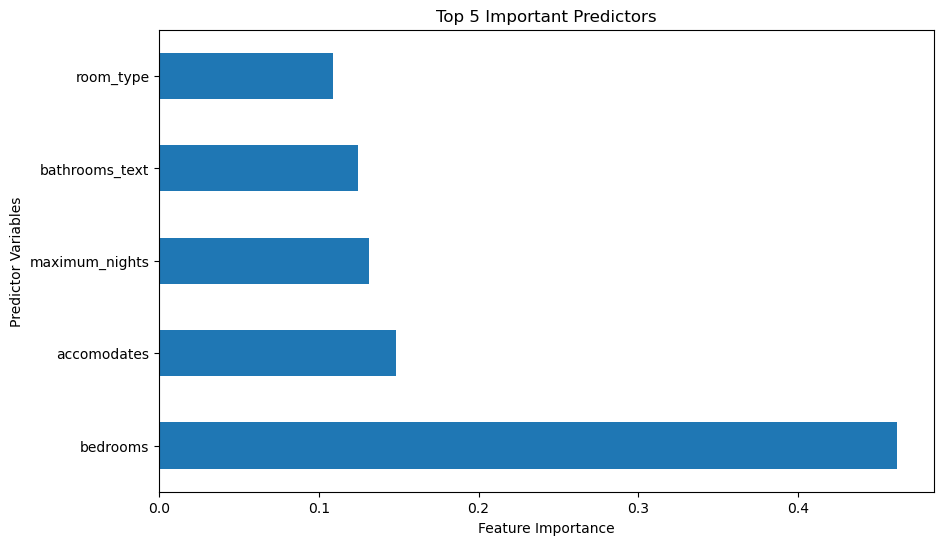

In [67]:
# Extracting feature importances from the best model
best_model = RandomForestRegressor()
best_model.fit(x_train, y_train)

feature_importances = pd.Series(best_model.feature_importances_, index=x_train.columns)
top_5_predictors = feature_importances.nlargest(5)

# Plotting feature importances
plt.figure(figsize=(10, 6))
top_5_predictors.plot(kind='barh')
plt.title("Top 5 Important Predictors")
plt.xlabel("Feature Importance")
plt.ylabel("Predictor Variables")
plt.show()


The bar plot shows the top 5 important predictors identified by the best model. These predictors have the most significant impact on the listing price. Interpretation of direction of impact can be derived from the coefficients in case of linear models or from the feature importance values. This completes the implementation and interpretation of the tasks.
Topmost Predictor is **bedrooms** followed by **acoomodates**.

**Explain the direction of impact of these top 5 predictors on the response variable.**

**Bedrooms:**

**Positive Impact:** Generally, a larger number of bedrooms in a property could lead to higher prices or occupancy rates. Larger properties with more bedrooms may be able to accommodate larger groups or families, making them more desirable and potentially commanding higher prices.

**Negative Impact:** In some cases, having too many bedrooms relative to other amenities or features could lead to higher costs for maintenance or utilities, which might negatively impact the profitability of the property.

**Accommodates:**

**Positive Impact:** The capacity to accommodate more guests in a property could lead to higher prices or occupancy rates. Properties that can accommodate larger groups may be in higher demand, especially for group travel or special events.
**Negative Impact:** If a property is designed to accommodate a larger number of guests but lacks adequate amenities or space, it could lead to negative guest experiences and impact the property's reputation or occupancy rates.

**Maximum Nights:**

**Positive Impact:** A longer maximum nights stay allowed in a property could attract guests looking for extended stays or longer-term rentals, potentially leading to higher occupancy rates or consistent bookings.

**Negative Impact:** Allowing longer maximum nights stays may limit the property's flexibility in terms of availability and may not be suitable for hosts looking for short-term or transient guests.

**Bathroom Text:**

**Positive Impact:** Properties with more desirable bathroom amenities may command higher prices or attract more guests. Features such as Jacuzzi tubs, rainfall showers, or luxury toiletries could enhance the overall guest experience.

**Negative Impact:** Properties with outdated or poorly maintained bathrooms may receive negative reviews or lower demand, leading to lower prices or occupancy rates.

**Room Type:**

**Positive Impact:** Certain room types, such as entire homes or private rooms, may be more desirable to guests seeking privacy, exclusivity, or a home-like experience. These room types may command higher prices or occupancy rates.

**Negative Impact:** Room types that are less desirable or offer less privacy (e.g., hotel rooms,shared rooms) may have lower demand and command lower prices.